In [1]:
import pyvisa
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.dc import DC
from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.signal_analyser import Anri
# from nanodrivers.visa_drivers.signal_analizar import Anri

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize

#file_store
import os

#time
import time
from datetime import datetime, timedelta

from ctypes import *
%matplotlib inline

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,0.4.209



In [3]:
dc = DC()
dc.idn()

Connection exist: HEWLETT-PACKARD,33120A,0,7.0-5.0-1.0



In [7]:
vna = VNA()
vna.idn()

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

Duration: 1:11:18.210914
Duration per round: 0:00:21.284631


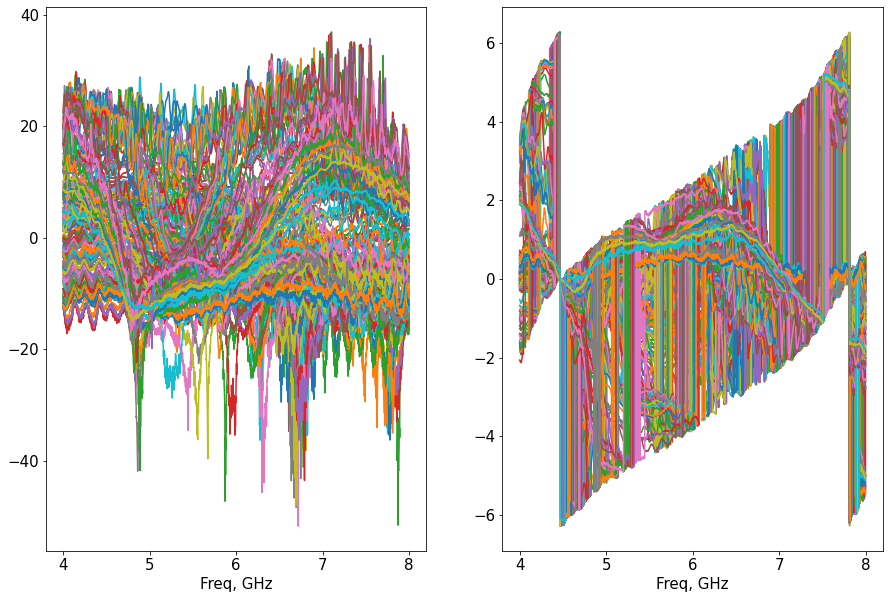

In [47]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(15,10)) 
ax[0].set_xlabel('Freq, GHz')
ax[1].set_xlabel('Freq, GHz')


volts = 3 
dc.set_volt(volts)
vna.set_lin()
vna.set_power(-10)
vna.set_band(100)
nop = 2000
vna.set_nop(nop)

anapico.set_off(1)
mag_ref, pha_ref = vna.get_data()
freq = vna.get_freq()
anapico.set_on(1)

freq_ana = np.linspace(9.1, 11.3, 200)*1e9
anapico.set_power(1, 8.6)
anapico.set_on(1)

state = dict()

state['vna'] = vna.dump
state['DC_dev'] = dc.dump
state['anapico'] = anapico.dump()

state['freq_ana'] = freq_ana
state['pow_ana'] = anapico.channel_pows[0]

state['mag_ref'] = mag_ref
state['mag_ref'] = pha_ref
state['vna_freq'] = freq

mag = np.empty((len(freq_ana), nop))
pha = np.empty((len(freq_ana), nop))

state['mag'] = mag
state['pha'] = pha

start = datetime.now() 

folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise\Katia\band_sweep'
file = r'FullBand_{}'.format(volts)+ start.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = folder +'\\' + file

for i in range(len(freq_ana)): 
    
    curr_time = datetime.now()
    print('{} -> {}, {}'.format(curr_time.strftime(r'%H:%M:%S'),  i, len(freq_ana)), end = '\r')
    anapico.set_freq(1, freq_ana[i])

    mag[i], pha[i] = vna.get_data()
    

    ax[0].plot(freq/1e9, mag[i]-mag_ref, label = r'$Q_{L}$')
    ax[1].plot(freq/1e9, pha[i]-pha_ref, label = r'$Q_{L}$')
    
    state['mag'] = mag
    state['pha'] = pha
    
    savemat(file_name, state)
    
end_time = datetime.now()
print('Duration: {}'.format(end_time - start,))
print('Duration per round: {}'.format((end_time - start)/(len(freq_ana)+1)))

In [188]:
font = {'size'   : 15}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14,7))
plt.subplots_adjust(wspace=0.3, hspace=0)
ax[0].set_xlabel('VNA frequency, GHz')
ax[0].set_ylabel('Pump frequency, GHz')
ax[1].set_xlabel('VNA frequency, GHz')
ax[1].set_ylabel('Pump frequency, GHz')
ax[0].title.set_text('Magnitude')
ax[0].title.set_text('Phase')

import matplotlib.colors as mcolors

colors_list = [(0.02, 0.15, 0.57),  (0.2, 0, 0.501), (0, 1, 1),    (0, 1, 0.7),  (0.07, 0.61, 0.09),
               (1, 0.87, 0), (1, 0.4, 0), (0.2, 0, 0.501), (0.9, 0.78, 1)]  
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list, N=256)

c = ax[0].pcolor(freq/1e9, freq_ana/1e9, mag-mag_ref, cmap=cmap)
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolor(freq/1e9, freq_ana/1e9, np.unwrap(pha_fixed), cmap='viridis')
fig.colorbar(c, ax=ax[1])

In [190]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(15,10)) 
ax[0].set_xlabel('Freq, GHz')
ax[1].set_xlabel('Freq, GHz')


volts = 3 
dc.set_volt(volts)
vna.set_lin()
vna.set_power(-10)
vna.set_band(100)
nop = 2000
vna.set_nop(nop)

anapico.set_off(1)
mag_ref, pha_ref = vna.get_data()
freq = vna.get_freq()
anapico.set_on(1)

power_ana = np.linspace(-5, 15, 200)
anapico.set_freq(1, 10.4e9)
anapico.set_on(1)

state = dict()

state['vna'] = vna.dump
state['DC_dev'] = dc.dump
state['anapico'] = anapico.dump()

state['power_ana'] = power_ana
state['pow_freq'] = 10.4

state['mag_ref'] = mag_ref
state['mag_ref'] = pha_ref
state['vna_freq'] = freq

mag = np.empty((len(power_ana), nop))
pha = np.empty((len(power_ana), nop))

state['mag'] = mag
state['pha'] = pha

start = datetime.now() 

folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise\Katia\band_sweep'
file = r'FullBand_{}_{}'.format(volts, 10.4)+ start.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = folder +'\\' + file

for i in range(len(power_ana)): 
    
    curr_time = datetime.now()
    print('{} -> {}, {}'.format(curr_time.strftime(r'%H:%M:%S'),  i, len(freq_ana)), end = '\r')
    anapico.set_power(1, power_ana[i])

    mag[i], pha[i] = vna.get_data()
    

    ax[0].plot(freq/1e9, mag[i]-mag_ref, label = r'$Q_{L}$')
    ax[1].plot(freq/1e9, pha[i]-pha_ref, label = r'$Q_{L}$')
    
    state['mag'] = mag
    state['pha'] = pha
    
    savemat(file_name, state)
    
end_time = datetime.now()
print('Duration: {}'.format(end_time - start,))
print('Duration per round: {}'.format((end_time - start)/(len(freq_ana)+1)))

Duration: 1:11:17.916814
Duration per round: 0:00:21.283168


In [198]:
font = {'size'   : 15}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14,7))
plt.subplots_adjust(wspace=0.3, hspace=0)
ax[0].set_xlabel('VNA frequency, GHz')
ax[0].set_ylabel('Pump power, dB')
ax[1].set_xlabel('VNA frequency, GHz')
ax[1].set_ylabel('Pump power, dB')
ax[0].title.set_text('Magnitude')
ax[1].title.set_text('Phase')

import matplotlib.colors as mcolors

colors_list = [ (0.2, 0.2, 0.701), (0, 1, 1),    (0, 1, 0.7),  (0.07, 0.61, 0.09),
               (1, 0.87, 0), (1, 0.4, 0), (0.2, 0, 0.501), (0.9, 0.78, 1)]  
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list, N=256)

c = ax[0].pcolor(freq/1e9, power_ana, mag-mag_ref, cmap=cmap)
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolor(freq/1e9, power_ana, np.unwrap(pha_fixed), cmap='viridis')
fig.colorbar(c, ax=ax[1])

In [199]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(15,10)) 
ax[0].set_xlabel('Freq, GHz')
ax[1].set_xlabel('Freq, GHz')


vna.set_lin()
vna.set_power(-10)
vna.set_band(100)
nop = 2000
vna.set_nop(nop)


DC = np.linspace(0, 5, 400)

anapico.set_power(1, 8.3)
anapico.set_freq(1, 10.4e9)

state = dict()

state['vna'] = vna.dump
state['DC_dev'] = dc.dump
state['anapico'] = anapico.dump()

state['power_ana'] = 8.3
state['pow_freq'] = 10.4

state['mag_ref'] = mag_ref
state['mag_ref'] = pha_ref
state['vna_freq'] = freq

mag = np.empty((len(DC), nop))
pha = np.empty((len(DC), nop))

state['mag'] = mag
state['pha'] = pha

start = datetime.now() 

folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise\Katia\band_sweep'
file = r'FullBand_{}_{}'.format(8.3, 10.4)+ start.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = folder +'\\' + file

for i in range(len(DC)): 
    
    curr_time = datetime.now()
    print('{} -> {}, {}'.format(curr_time.strftime(r'%H:%M:%S'),  i, len(DC)), end = '\r')
    
    dc.set_volt(DC[i])
    time.sleep(20)
    
    anapico.set_off(1)
    mag_ref, pha_ref = vna.get_data()
    freq = vna.get_freq()
    anapico.set_on(1)

    mag_curr, pha_curr = vna.get_data()
    
    mag[i] = mag_curr - mag_ref
    pha[i] = pha_curr - pha_ref

    ax[0].plot(freq/1e9, mag[i], label = r'$Q_{L}$')
    ax[1].plot(freq/1e9, pha[i], label = r'$Q_{L}$')
    
    state['mag'] = mag
    state['pha'] = pha
    
    savemat(file_name, state)
    
end_time = datetime.now()
print('Duration: {}'.format(end_time - start,))
print('Duration per round: {}'.format((end_time - start)/(len(freq_ana)+1)))

anapico.off(1)
dc.set_volt(0)

Duration: 7:00:05.711975
Duration per round: 0:02:05.401552


AttributeError: 'ANAPICO' object has no attribute 'off'

In [20]:
dc.set_volt(0)

In [21]:
anapico.set_off(1)

In [2]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise\Katia\band_sweep'

files = os.listdir(initial_folder)
for i in range(len(files)):
    if ".fig" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[0] -----------> ana_freq_sweep_mag.png
[1] -----------> ana_power_sweep_mag.png
[2] -----------> DC_sweep_mag.png
[3] -----------> FullBand_32024-03-12-13-29-02.mat
[4] -----------> FullBand_32024-03-12-13-31-32.mat
[5] -----------> FullBand_32024-03-12-13-34-39.mat
[6] -----------> FullBand_32024-03-12-13-40-02.mat
[7] -----------> FullBand_3_10.42024-03-12-16-33-18.mat
[8] -----------> FullBand_3_10.42024-03-12-16-35-04.mat
[9] -----------> FullBand_8.3_10.42024-03-12-18-20-19.mat


In [10]:
import scipy.io
from scipy.io import savemat

folder = files[9]
        
mat = scipy.io.loadmat(initial_folder+"\\"+folder)
pha = mat['pha']
mag = mat['mag']
freq = mat['vna_freq'][0]
DC = np.linspace(0, 5, 400)

In [11]:
shape(mag)

(400, 2000)

In [13]:
%matplotlib qt
font = {'size'   : 15}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14,7))
plt.subplots_adjust(wspace=0.3, hspace=0)
ax[0].set_xlabel('VNA frequency, GHz')
ax[0].set_ylabel('Pump power, dB')
ax[1].set_xlabel('VNA frequency, GHz')
ax[1].set_ylabel('Pump power, dB')
ax[0].title.set_text('Magnitude')
ax[1].title.set_text('Phase')

import matplotlib.colors as mcolors

colors_list = [ (0.2, 0.2, 0.701), (0, 1, 1),    (0, 1, 0.7),  (0.07, 0.61, 0.09),
               (1, 0.87, 0), (1, 0.4, 0), (0.2, 0, 0.501), (0.9, 0.78, 1)]  

cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list, N=256)

c = ax[0].pcolor(  freq/1e9, DC,mag, cmap=cmap)
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolor(freq/1e9, DC, np.unwrap(pha), cmap='viridis')
fig.colorbar(c, ax=ax[1])